# **YOUTHRIVE DATA SCIENCE  CAPSTONE PROJECT**




## INCOME LEVEL PREDICTION USING INCOME_DATA.CSV



### *AUTHOR: PRECIOUS OMOWHO UGOSO*

- ### 1.1. Introduction

Income refers to the amount of money received or earned by an individual, household, or organization over a specific period, measured in monetary terms (e.g., naira, dollar, euro...), but this project, focused on individual's income.
Income represents the flow of funds from several ends, making the purchases of goods, services, and assets possible.
The data used for this project comprised of individuals with different levels of education, native country, and occupation which resulted in varying levels of income.
Thus, income level prediction is the process of using statistical and machine learning techniques to predict an individual's or household income level based on different factors (age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, income). It provides valuable insights into socioeconomic changes,which helps organizations and policy makers make informed decisions. 

- ### 1.2. AIM
The aim of this project is to develop a machine learning model to predict whether a person’s income exceeds $50K/yr based on census data. 

- ### 1.3. OBJECTIVES
1. to predict whether a person’s income exceeds $50K/yr based on census data. 
2. investigate the relationship between income levels and education level.
3. explore and identify relevant features in the dataset. 
4. develop and evaluate different machine learning models, then select best performing model using metrics evaluation.
5. provide insights into factors influencing income levels.

In [1]:
#importing the necessary libaries, modules, and algorithms 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    roc_auc_score, 
    roc_curve, 
    r2_score,
    precision_score,
    recall_score,
    accuracy_score,
    classification_report,
    auc,
    confusion_matrix
)
# ignoring warnings
import warnings
warnings.filterwarnings("ignore")

# setting plt style
plt.style.use("ggplot")

!pip install joblib

import joblib

Defaulting to user installation because normal site-packages is not writeable


- ### 1.4. Data exploration

In [2]:
# loading the dataset

incomep = pd.read_csv("income_data.csv")

In [3]:
incomep.head() # inspecting the first few rows

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# dropping irrelevant columns, and exploring the data

incomep.drop(["education-num", "capital-gain", "capital-loss", "fnlwgt"], axis=1, inplace= True)
display(incomep.info())
display(incomep.describe())
incomep.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   education       48842 non-null  object
 3   marital-status  48842 non-null  object
 4   occupation      47876 non-null  object
 5   relationship    48842 non-null  object
 6   race            48842 non-null  object
 7   sex             48842 non-null  object
 8   hours-per-week  48842 non-null  int64 
 9   native-country  48568 non-null  object
 10  income          48842 non-null  object
dtypes: int64(2), object(9)
memory usage: 4.1+ MB


None

,age,hours-per-week
count,48842.000000,48842.000000
mean,38.643585,40.422382
std,13.710510,12.391444
min,17.000000,1.000000
25%,28.000000,40.000000
50%,37.000000,40.000000
75%,48.000000,45.000000
max,90.000000,99.000000


,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [5]:
# renaming the column names into a python format

incomep= incomep.rename(columns={"marital-status":"marital_status", "hours-per-week":"hours_per_week", "native-country":"native_country"})

In [6]:
incomep.shape  #checking the number of rows and columns of the data set

(48842, 11)

In [7]:
# checking for missing values

incomep.isna().sum()

age                 0
workclass         963
education           0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
hours_per_week      0
native_country    274
income              0
dtype: int64

In [8]:
# dropping the missing values

incomep.dropna(inplace=True)
incomep= incomep.reset_index(drop=True)

In [9]:
# checking if the missing values have been dealt with

incomep.isna().sum()

age               0
workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [10]:
incomep.shape

(47621, 11)

- ### 1.5. Exploratory Data analysis

In [11]:
# number of job types in the category

incomep['occupation'].value_counts()

Prof-specialty       6110
Craft-repair         6089
Exec-managerial      6058
Adm-clerical         5589
Sales                5474
Other-service        4891
Machine-op-inspct    3006
Transport-moving     2341
Handlers-cleaners    2066
?                    1843
Farming-fishing      1485
Tech-support         1436
Protective-serv       981
Priv-house-serv       238
Armed-Forces           14
Name: occupation, dtype: int64

In [11]:
# removing the unknown job type "?"

incomep= incomep.drop(incomep[incomep['occupation']=='?'].index)

In [12]:
incomep['occupation'].value_counts() # number of job types in the category

Prof-specialty       6110
Craft-repair         6089
Exec-managerial      6058
Adm-clerical         5589
Sales                5474
Other-service        4891
Machine-op-inspct    3006
Transport-moving     2341
Handlers-cleaners    2066
Farming-fishing      1485
Tech-support         1436
Protective-serv       981
Priv-house-serv       238
Armed-Forces           14
Name: occupation, dtype: int64

### Interpretation

from the above output, it can be seen that one of the job types is '?', so removing it from the occupation column, 14 job types are left with **Prof-specialty** being the category with the highest count, and **Armed-Forces** being the category with the lowest count, this implies that more of the respondents under that particular census survey are in academia, or a specialized field (university professor, research scientist, lawyer, engineer, consultant, medical specialist...).

In [14]:
# marital status for the respondents in the different categories

incomep['marital_status'].value_counts()

Married-civ-spouse       21329
Never-married            14784
Divorced                  6341
Separated                 1431
Widowed                   1290
Married-spouse-absent      571
Married-AF-spouse           32
Name: marital_status, dtype: int64

In [15]:
# educational level of the respondents

incomep['education'].value_counts()

HS-grad         14911
Some-college     9996
Bachelors        7708
Masters          2562
Assoc-voc        1973
11th             1627
Assoc-acdm       1519
10th             1234
7th-8th           839
Prof-school       801
9th               684
12th              593
Doctorate         567
5th-6th           464
1st-4th           227
Preschool          73
Name: education, dtype: int64

### Interpretation

from the marital status and education level count, it can be seen that 21,329 of the respondents are married, and 14,784 are not married, which could be in relation with some bachelor and college count, also, the data shows that most of the individuals have attained high levels of education, which **might be a factor** in the income received yearly in dollars.


In [16]:
# Gender count

dem_gender= incomep['sex'].value_counts()
print(dem_gender)

Male      30935
Female    14843
Name: sex, dtype: int64


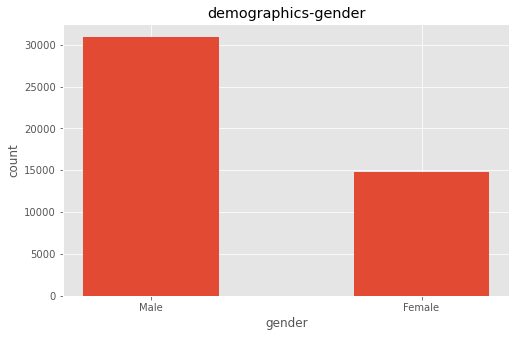

In [17]:
# plotting a bar chart to represent the gender count

dem_gender= incomep['sex'].value_counts()

x= dem_gender.index
y= dem_gender.values

plt.figure(figsize=(8,5))
plt.bar(x,y, width=0.5)
plt.title('demographics-gender')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

### Interpretation

The plot above shows that the male respondents had a higher count than the female respondents, which implies that the geographical region where the census was conducted from had a higher number of males.

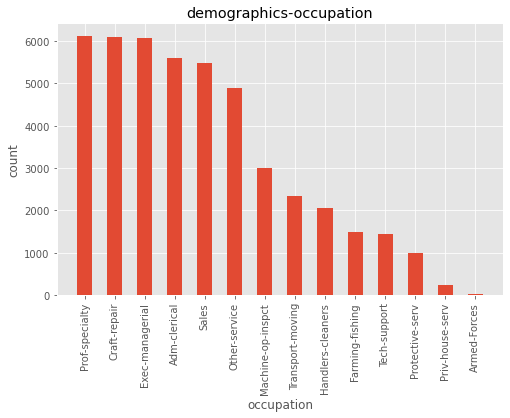

In [18]:
# a bar chart showing the number of job types in the occupation column

dem_occupation= incomep['occupation'].value_counts()

x= dem_occupation.index
y= dem_occupation.values

plt.figure(figsize=(8,5))
plt.bar(x,y, width=0.5)
plt.xticks(rotation=90)
plt.title('demographics-occupation')
plt.xlabel('occupation')
plt.ylabel('count')
plt.show()

In [16]:
# country count 

country= incomep['native_country'].value_counts()
print(country)

United-States                 41292
Mexico                          903
?                               556
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                        

In [13]:
# removing the unknown native_country type "?"

incomep= incomep.drop(incomep[incomep['native_country']=='?'].index)

In [14]:
country= incomep['native_country'].value_counts() # cross-checking
print(country)

United-States                 41292
Mexico                          903
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     

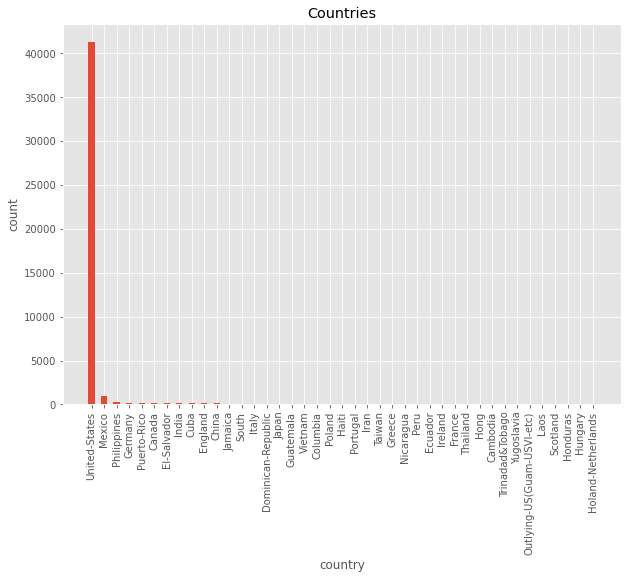

In [19]:
# a bar chart showing the country count

country= incomep['native_country'].value_counts()

x= country.index
y= country.values

plt.figure(figsize=(10,7))
plt.bar(x,y, width=0.5)
plt.xticks(rotation=90)
plt.title('Countries')
plt.xlabel('country')
plt.ylabel('count')
plt.show()

In [20]:
i_income= incomep['income'].value_counts()
print(i_income)

<=50K    34014
>50K     11208
Name: income, dtype: int64


In [21]:
incomep.shape

(45222, 11)

### Interpretation

from native country and income counts, it can be said that the census was conducted in 41 countries with United States having the highest count, and Holand-Netherlands having the least count. Also, out of the 45,222 respondents, 34,014 received less than or equal to 50K/yr in dollars. while 11,208 received more than 50K/yr in dollars.


- ### 1.6. Data preprocessing

In [15]:
#separating the data set into two categories

cat_variables = incomep.select_dtypes(exclude=np.number).drop(['income','education'], axis=1) # since the income and education variables will be coded differently
num_variables = incomep.select_dtypes(include=np.number)

In [16]:
# calling the categorical variables

cat_variables

,workclass,marital_status,occupation,relationship,race,sex,native_country
0,State-gov,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...
47616,Private,Never-married,Prof-specialty,Own-child,White,Male,United-States
47617,Private,Divorced,Prof-specialty,Not-in-family,White,Female,United-States
47618,Private,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
47619,Private,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,United-States


In [17]:
# calling the numerical variables

num_variables

,age,hours_per_week
0,39,40
1,50,13
2,38,40
3,53,40
4,28,40
...,...,...
47616,33,40
47617,39,36
47618,38,50
47619,44,40


In [18]:
# encoding the variables

# encoding the target variable
label_encoder= LabelEncoder()
label= incomep['income']
lab_enc= label_encoder.fit_transform(label)

# encoding the education levels 
ordinal_encoder= OrdinalEncoder()
ord_enc= ordinal_encoder.fit_transform(incomep[['education']])
ord_enc_df = pd.DataFrame(ord_enc, columns=['education'])  # Create DataFrame for education

    
# encoding the remaining categorical variables   
one_hot_encoder= OneHotEncoder(sparse= False)
encoded_d= one_hot_encoder.fit_transform(cat_variables)
ohe_features= pd.DataFrame(encoded_d)



#### Analysis

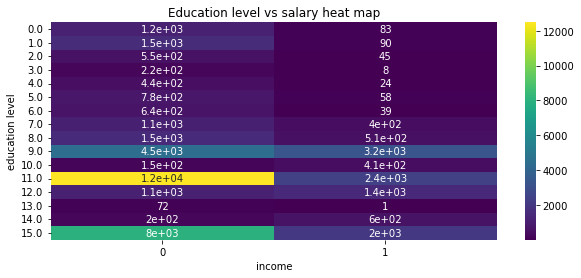

In [47]:
# plotting a heat map to show the correlation between education levels and income

crosstab= pd.crosstab(incomep['education'],incomep['income'])
plt.figure(figsize= (10,4))
sns.heatmap(crosstab, cmap='viridis', annot= True)
plt.title('Education level vs salary heat map')
plt.xlabel('income')
plt.ylabel('education level')
plt.show()

In [51]:
en= ordinal_encoder.categories_[0]
print(en)

['10th' '11th' '12th' '1st-4th' '5th-6th' '7th-8th' '9th' 'Assoc-acdm'
 'Assoc-voc' 'Bachelors' 'Doctorate' 'HS-grad' 'Masters' 'Preschool'
 'Prof-school' 'Some-college']


**index** :    **education level**
- 0        :       10th
- 1        :      11th
- 2        :      12th
- 3        :     1st-4th
- 4        :     5th-6th
- 5        :     7th-8th
- 6        :     9th
- 7        :     Assoc-acdm
- 8        :     Assoc-voc
- 9        :     Bachelors
- 10       :     Doctorate
- 11       :     HS-grad
- 12       :     Masters
- 13       :     Preschool
- 14       :     Prof-school
- 15       :     Some-college

 the code below was copied into the cell(markdown) to show the coding scheme used


- print(label_encoder.classes_)
- print(incomep|'income'|.value_counts())

|'<=50K'|  | '>50K'|


 - **Income**       :  **Count**
 * (<=50K) : 36080 -----index '0'
 * (>50K)  : 11541 ----- index '1'
 * Name: income, dtype: int64


### Interpretation

- The income was coded '0' for <= 50k with individuals being 36,080, and '1' for > 50k with individuals being 11,541, then the education levels were coded from **0 to 15** as seen in the three previous cells.



####  **Color interpretation**
- yellow = high frequency(12000)  strong associaton between education level and income 
- green = moderate frequency(7000-10000)  moderate associaton between education level and income 
- light blue = lower frequency
- purple = low frequency
- dark purple = lowest frequency little or no association between variables



income levels coded '1' with purple, or blue color has a lower frequency of individuals earning >50k.


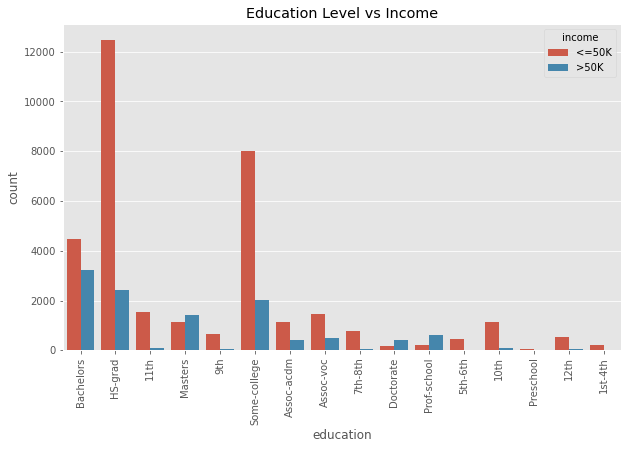

In [17]:
# plotting a barchart to show the different income earnings(>50k and <=50k) of each education level

plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='income', data=incomep)
plt.title('Education Level vs Income')
plt.xticks(rotation=90)
plt.show()

**Interpretation**
from the heatmap and bar charts, it is observed that under the <= 50k column, the HS-grad category had more persons earning <=50k (**indicated with yellow on the heatmap, and a higher count on the bar chart**)... The above analysis interprets each education level and it's related income.

In [21]:
incomep.dtypes

marital_status_Divorced                 float64
marital_status_Married-AF-spouse        float64
marital_status_Married-civ-spouse       float64
marital_status_Married-spouse-absent    float64
marital_status_Never-married            float64
                                         ...   
native_country_Thailand                 float64
native_country_Trinadad&Tobago          float64
native_country_United-States            float64
native_country_Vietnam                  float64
native_country_Yugoslavia               float64
Length: 83, dtype: object

In [20]:
display(incomep)

,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
47616,33,Private,Bachelors,Never-married,Prof-specialty,Own-child,White,Male,40,United-States,<=50K
47617,39,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,36,United-States,<=50K
47618,38,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,50,United-States,<=50K
47619,44,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,40,United-States,<=50K


In [19]:
# to check if the data is normally distributed or not (mean=median=mode)
# using 'age, hours per week' variables as the yardstick

mean_v= incomep.mean()
display(f"Mean: {mean_v}")
print("==================================")

median_v= incomep.median()
display(f"Median: {median_v}")
print("==================================")

mode_v= incomep.mode()
display(f"Mode: {mode_v}")

'Mean: age               38.547941\nhours_per_week    40.938017\ndtype: float64'

'Median: age               37.0\nhours_per_week    40.0\ndtype: float64'

'Mode:    age workclass education      marital_status    occupation relationship  \\\n0   36   Private   HS-grad  Married-civ-spouse  Craft-repair      Husband   \n\n    race   sex  hours_per_week native_country income  \n0  White  Male              40  United-States  <=50K  '

- ### 1.7. Standardization

In [20]:
# using the standard scaler since the dataset is normally distributed

scaler = StandardScaler()
x_scaled = scaler.fit_transform(num_variables)

In [21]:
x_scaled.shape

(45222, 2)

- ### 1.8. Feature engineering

In [22]:
# getting the pca (principal component analysis ) value

pca= PCA(n_components=0.95)
p_c_a = pca.fit_transform(x_scaled)

In [23]:
# getting the Variance Threshold

variance_threshold= VarianceThreshold(0.3)
incomep= variance_threshold.fit_transform(x_scaled)

In [24]:
# arranging the data set into target and independent variables

ord_enc_d= pd.DataFrame(ord_enc, columns=['education'])

x = pd.concat([ord_enc_df, ohe_features, pd.DataFrame(x_scaled)], axis=1)

y= lab_enc

In [25]:
# splitting the dataset  

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state= 42)


- ### 1.9. Hyperparameter tuning and model training

Evaluation will be done using different models, so as to know which of the models will gve a better performance, also a grid of hyperparameters will be defined to see which one exactly makes the model a better fit.

#### Random Forest Classifier Algorithm ####

In [30]:
# evaluation using Random forest classifier algorithm

params_grid= {
   'n_estimators': [100,200],
    'criterion': ['entropy','gini']
}  
    

Random_Forest= RandomForestClassifier()
  
    
random_search= RandomizedSearchCV(estimator=Random_Forest, param_distributions= params_grid, n_iter=10)
random_search.fit(x_train, y_train) 
                                 
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'n_estimators': 100, 'criterion': 'entropy'}
Best Score: 0.8083715052914231


In [31]:
y_pred= random_search.best_estimator_.predict(x_test)
y_pred_proba_rf = random_search.best_estimator_.predict_proba(x_test)[:, 1]


acc_rf= accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)

recall= recall_score(y_test,y_pred)
confusion_mat= confusion_matrix(y_test,y_pred)


print(f"Accuracy:{acc_rf:.2f}")
print(f"Precision:{precision:.2f}")
print(f"Recall:{recall:.2f}")
print(f"Confusion matrix:\n{confusion_mat}")


    

Accuracy:0.81
Precision:0.65
Recall:0.55
Confusion matrix:
[[9177 1016]
 [1502 1872]]


#### Logistic Regression Algorithm ####

In [26]:
params_grid= {
   'C':[0.1,1]}  
    

Logistic_Regression= LogisticRegression()
  
    
random_search= RandomizedSearchCV(estimator=Logistic_Regression, param_distributions= params_grid, n_iter=10)
random_search.fit(x_train, y_train) 
                                 
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Best Parameters: {'C': 1}
Best Score: 0.8167430105828462


In [27]:
y_pred= random_search.best_estimator_.predict(x_test)
y_pred_proba_log =  random_search.best_estimator_.predict_proba(x_test)[:, 1]

acc_log= accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)     
recall= recall_score(y_test,y_pred)
confusion_mat= confusion_matrix(y_test,y_pred)

print(f"Accuracy:{acc_log:.2f}")
print(f"Precision:{precision:.2f}")
print(f"Confusion matrix:\n{confusion_mat}")
    

Accuracy:0.82
Precision:0.69
Confusion matrix:
[[9368  825]
 [1567 1807]]


####  Decision Tree Classifier Algorithm ####

In [28]:
# evaluation using decision tree algorithm

params_grid= {
   'max_depth':[None,5,10],
    'criterion': ['gini','entropy']
}  
    

Decision_Tree= DecisionTreeClassifier()
  
    
random_search= RandomizedSearchCV(estimator=Decision_Tree, param_distributions= params_grid, n_iter=10)
random_search.fit(x_train, y_train) 
                                 
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)



Best Parameters: {'max_depth': 10, 'criterion': 'entropy'}
Best Score: 0.8217343231716949


In [29]:
y_pred= random_search.best_estimator_.predict(x_test)
y_pred_proba_tree = random_search.best_estimator_.predict_proba(x_test)[:, 1]

acc_tree= accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)     
recall= recall_score(y_test,y_pred)
confusion_mat= confusion_matrix(y_test,y_pred)

print(f"Accuracy:{acc_tree:.2f}")
print(f"Precision:{precision:.2f}")
print(f"Confusion matrix:\n{confusion_mat}")
    

Accuracy:0.82
Precision:0.66
Confusion matrix:
[[9206  987]
 [1424 1950]]


#### SVC Algorithm ####

In [53]:
# evaluation using SVC algorithm

params_grid= {
   'C':[0.1,1],
    'kernel':['linear','rbf']
}  
    

svc= SVC()
  
    
random_search= RandomizedSearchCV(estimator=svc, param_distributions= params_grid, n_iter=10)
random_search.fit(x_train, y_train) 
                                 
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Best Parameters: {'kernel': 'rbf', 'C': 1}
Best Score: 0.8162375612067603


In [56]:
y_pred= random_search.best_estimator_.predict(x_test)

accuracy= accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)     
recall= recall_score(y_test,y_pred)
confusion_mat= confusion_matrix(y_test,y_pred)

print(f"Accuracy:{accuracy:.2f}")
print(f"Precision:{precision:.2f}")
print(f"Confusion matrix:\n{confusion_mat}")
    

Accuracy:0.82
Precision:0.68
Confusion matrix:
[[9311  882]
 [1507 1867]]


- ### 2.0. Model performance

In [32]:

# Assuming you have y_test (ground truth labels) and y_pred_proba (model predictions)

# Calculate ROC curves and thresholds for each model
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_pred_proba_log)
auc_score_log = auc(fpr_log, tpr_log)

fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_pred_proba_tree)
auc_score_tree = auc(fpr_tree, tpr_tree)

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
auc_score_rf = auc(fpr_rf, tpr_rf)



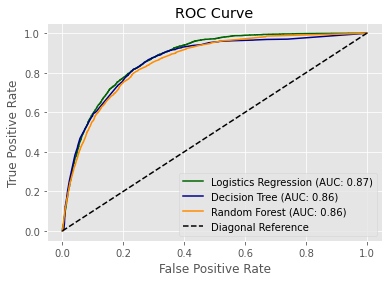

In [33]:
# Plot ROC curves
plt.plot(fpr_log, tpr_log, color='darkgreen', label=f'Logistics Regression (AUC: {auc_score_log:.2f})')
plt.plot(fpr_tree, tpr_tree, color='darkblue', label=f'Decision Tree (AUC: {auc_score_tree:.2f})')
plt.plot(fpr_rf, tpr_rf, color='darkorange', label=f'Random Forest (AUC: {auc_score_rf:.2f})')

# Plot the diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', label='Diagonal Reference')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

- ### 2.1. Summary and Recommendations

This project evaluated and predicted if the income of indivduals exceed 50k per year based on the income data provided, using different models to evaluate it. 
The insights gotten in the above cells from the dataset sufficiently explained the data.
The best performing model will provide insights into the relationship between the income and other variables.


- ### Recommendations
1. explore other feature engineering techniques
2. increase the sample size and features
3. develop a web application for deployment so as to make insightful predictions
4. consider using other ensemble learning techniques to improve model performance

- ### 2.2. Saving the model

In [34]:
models= {
    'Random Forest':
    RandomForestClassifier(),
    'Logistic Regression':
    LogisticRegression(),
    'SVC': SVC(),
    'Decision Tree':
    DecisionTreeClassifier()
}  


# save the dictionary
joblib.dump(models, "all_models.pkl")

['all_models.pkl']